###Libraries

In [3]:
!pip install pyzbar
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

#Libraries

In [4]:
from pyzbar.pyzbar import decode
from PIL import Image
from bs4 import BeautifulSoup
import requests
import csv

#Image

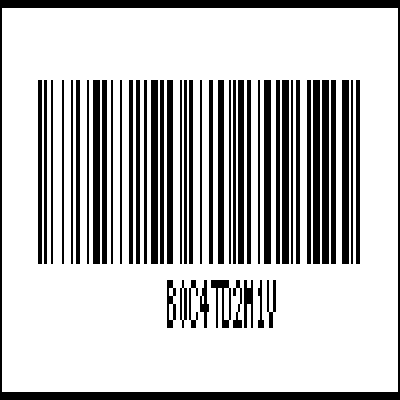

In [5]:
original_image = Image.open('/content/image (2).png')
max_size = (400,400)
resized_image = original_image.resize(max_size)
resized_image

#Decoding

In [6]:
img=decode(Image.open('/content/image (2).png'))
# Check if there is any decoded data
if img:
    # Extract the URL from the decoded data
    bar = img[0].data.decode('utf-8')
    print("URL:", bar)
else:
    print("No QR code found in the image.")


URL: B0C4TD2M1V


#URL

In [7]:
base_url = 'https://www.amazon.com/gp/product/'
url = base_url + bar
print(url)

https://www.amazon.com/gp/product/B0C4TD2M1V


#HEADER

In [8]:
headers={
    'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

#FETCH DATA

In [9]:
response=requests.get(url,headers)
soup=BeautifulSoup(response.text,'lxml')
title_element=soup.select_one('#productTitle')
title=title_element.text.strip()
print("***********************************************************************************************************************")
print("Product Tittle")
print(title)
print("***********************************************************************************************************************")
print()
print("Product Price")
pricee=soup.select_one('span.a-price-whole')
print(pricee.text)
print("***********************************************************************************************************************")
print()
image_element = soup.select_one('.a-dynamic-image')
image_url = image_element['src']
print("Image URL:")
print(image_url)
print("***********************************************************************************************************************")
print()
#print(response.text)



***********************************************************************************************************************
Product Tittle
Konokyo Insulated Water Bottle with Straw,32oz 3 Lids Metal Bottles Stainless Steel Water Flask,Macaron Green
***********************************************************************************************************************

Product Price
11.
***********************************************************************************************************************

Image URL:
https://m.media-amazon.com/images/I/615UixUdHUL.__AC_SX300_SY300_QL70_ML2_.jpg
***********************************************************************************************************************

